## Import Libraries

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#### Merge 12 months of sales data into one file

In [30]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir("D:/Course Work/Pandas-Sales-Analysis/Sales_Data")]

for file in files:
    df=pd.read_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/all_data_copy.csv", index=False)
        

In [32]:
all_data = pd.read_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean The Data

#### Remove NaN 

In [37]:

all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [42]:
#temp = all_data[all_data['Order Date'].str[0:2]=='Or']
#temp
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Add month column

In [43]:
all_data['Month'] = all_data["Order Date"].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
#Error 1: can't convert NaN to Int => Remove NaN
#Error 2: invalid literal for int(): 'Or' => Find 'Or' and delete it. For some reason, Order Date[:2] col had 'Or' instead of number

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [77]:
address = all_data['Purchase Address'].str.split(',')
cities = [row [1] for row in address]



In [78]:
all_data['City'] = cities

## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

In [49]:
# Sales = Qunatity Ordered * Price Each
# First conver Qunatity Ordered and Price Each to numeric using pd.to_numeric()
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Add sales column 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [57]:
results = all_data.groupby(['Month'])['Sales'].sum()
print (results)
##To sum up all numeric columns  use this instead
# numeric_columns = all_data.select_dtypes(include='number').columns
# all_data.groupby(['Month'])[numeric_columns].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


#### Show sales sum in bar chart

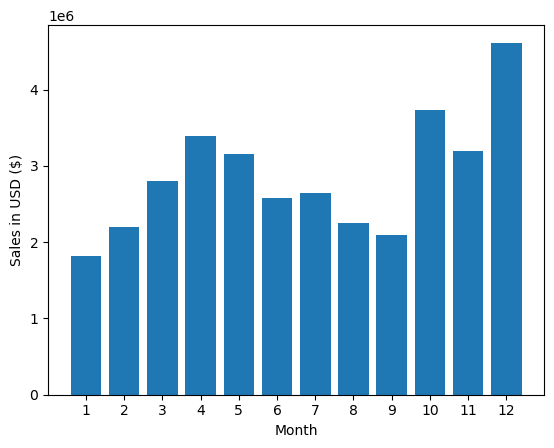

In [59]:
months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

#### Question 2: What city sold the most product?

In [102]:
all_data.groupby(['City']).sum()

C:\Users\sarah\AppData\Local\Temp\ipykernel_6124\4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48
